In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import pairwise_distances

#For plotting
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt
from pandas.plotting import scatter_matrix

In [2]:
# Get time series data:
data = pd.read_csv('GamesDataAll.csv')

# Make percentile into number and clear "-"
data = data.replace(to_replace='%', value='', regex=True).replace({'-':'NaN'})#.replace(to_replace='Inf', value=+100, regex=True)
#data['Perc_Gain'] = data['Perc_Gain']/100

data.head()

,App_id,Name,Avg_Players,Gain,Perc_Gain,Peak_Players,Last 30 Days,April 2021,March 2021,February 2021,...,April 2013,March 2013,February 2013,January 2013,December 2012,November 2012,October 2012,September 2012,August 2012,July 2012
0,730,Counter-Strike: Global Offensive,1,0,0,0,695044.47,723346.52,740927.82,741013.24,...,16006.0,15959.89,17372.73,16164.22,14079.39,14134.1,10739.48,16000.75,15475.39,932.57
1,730,Counter-Strike: Global Offensive,0,1,0,0,-28302.0,-17581.31,-85.42,-2196.42,...,46.11,-1412.84,1208.51,2084.83,-54.71,3394.62,-5261.27,525.36,14542.81,NaN
2,730,Counter-Strike: Global Offensive,0,0,1,0,-3.91,-2.37,-0.01,-0.30,...,+0.29,-8.13,+7.48,+14.81,-0.39,+31.61,-32.88,+3.39,+1559.43,NaN
3,730,Counter-Strike: Global Offensive,0,0,0,1,1119102,1148077,1198581,1123485,...,31966,32166,35238,31359,27553,50533,20850,36057,52261,1642
4,570,Dota 2,1,0,0,0,413025.27,413784.97,390412.76,404832.13,...,174835.73,180878.9,166972.97,147748.14,121924.42,101077.43,75965.44,61867.68,55768.61,52721.05


In [3]:
# Get Perc_Gain.
p_gain = data.loc[data['Perc_Gain']==1]
p_gain = p_gain.drop(columns=['Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players','Last 30 Days'])
p_gain_pure = p_gain.drop(columns=['App_id', 'Name']).astype(float)

p_gain.sample(5)

,App_id,Name,April 2021,March 2021,February 2021,January 2021,December 2020,November 2020,October 2020,September 2020,...,April 2013,March 2013,February 2013,January 2013,December 2012,November 2012,October 2012,September 2012,August 2012,July 2012
22026,1253570,Futuball - Future Football Manager Game,+4.65,-2.88,+5.53,-0.73,-11.24,+3.26,-16.44,-3.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6910,235600,Tom Clancy's Splinter Cell Blacklist,-25.68,+26.16,-18.33,+0.36,+29.15,+9.31,-38.28,+16.42,...,+Inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19606,351640,Eternal Senia,-13.91,-21.91,+10.74,+17.01,+0.18,-6.77,-1.70,-26.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1838,1295510,DRAGON QUEST XI S: Echoes of an Elusive Age – ...,-6.73,+21.52,-38.50,-24.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21398,270170,Depression Quest,-13.54,-7.68,+11.88,+6.57,+20.62,-18.89,+24.64,-14.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Get Avg_Players.
avg_players = data.loc[data['Avg_Players']==1]
avg_players = avg_players.drop(columns=['Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players','Last 30 Days'])
avg_pure = avg_players.drop(columns=['App_id', 'Name']).astype(float)

avg_players.sample(5)

,App_id,Name,April 2021,March 2021,February 2021,January 2021,December 2020,November 2020,October 2020,September 2020,...,April 2013,March 2013,February 2013,January 2013,December 2012,November 2012,October 2012,September 2012,August 2012,July 2012
30572,1121270,Impossible Soaring,0.3,0.39,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21984,485380,Welcome to the Game,5.58,5.3,5.52,5.45,4.33,5.01,4.87,5.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9248,391720,Layers of Fear,46.74,53.77,74.53,73.31,72.48,97.1,94.47,78.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37912,922420,MY HERO ONE'S JUSTICE Playable Character: Deku...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20720,947970,Roads of Rome: New Generation 2,3.25,3.43,3.85,4.14,3.43,3.88,3.95,3.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Add columns of max and mean and sort the dataframe
avg_players['max'] = avg_pure.max(axis=1)
avg_players['mean'] = avg_pure.mean(axis=1)

In [24]:
features = pd.read_csv('games-features.csv')
features = features.drop_duplicates(subset=['ResponseID','ResponseName'], keep='first', inplace=False, ignore_index=False)
features = features.drop(columns=['QueryID', 'QueryName','RequiredAge'])
features = features.rename(columns={'ResponseID':'App_id','ResponseName':'Name'}, errors="raise")

data_craig = pd.merge(features, avg_players[['App_id','max','mean']], how='inner', on=['App_id'])
data_craig = data_craig.loc[data_craig['GenreIsNonGame']==False]
data_craig.sort_values(by=['max'], ascending=False, inplace=True)#.reset_index(drop=True)"

#grades = [1]*50+[2]*50+[3]*400+[4]*500+[5]*2450
#avg_graded = avg_players.loc[avg_players['max']>=1].copy()
#data_craig['Grade'] = grades

data_craig.reset_index(drop=True).to_csv('CraigGamesData-Max.csv')

In [25]:
data_craig

,App_id,Name,ReleaseDate,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,PackageCount,RecommendationCount,...,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText,max,mean
25,730,Counter-Strike: Global Offensive,Aug 21 2012,0,1,0,83,8,1,1427633,...,Czech Danish Dutch English* Finnish French Ger...,http://blog.counter-strike.net/,Minimum:OS: Windows(r) 7/Vista/XPProcessor: In...,,Minimum:OS: Ubuntu 12.04Processor: 64-bit Dual...,,Minimum:OS: MacOS X 10.6.6 or higherProcessor:...,,857604.22,316635.260189
22,570,Dota 2,Jul 9 2013,0,1,0,90,4,0,590480,...,Bulgarian Czech Danish Dutch English* Finnish ...,http://www.dota2.com/,Minimum:OS: Windows 7 or newerProcessor: Dual ...,,Minimum:OS: Ubuntu 12.04Processor: Dual core f...,,Minimum:OS: OS X Mavericks 10.9Processor: Dual...,,709178.26,452757.727453
2450,377160,Fallout 4,Nov 9 2015,0,1,7,84,10,1,72929,...,English* French* Italian* German* Spanish* Pol...,http://www.fallout4.com,Minimum:OS: Windows 7/8/10 (64-bit OS required...,Recommended:OS: Windows 7/8/10 (64-bit OS requ...,,,,,226297.83,22651.106970
1467,271590,Grand Theft Auto V,Apr 13 2015,0,1,0,96,9,7,136846,...,English* French Italian German Spanish Korean ...,http://www.rockstargames.com/V/,Minimum:OS: Windows 8.1 64 Bit Windows 8 64 Bi...,Recommended:OS: Windows 8.1 64 Bit Windows 8 6...,,,,,192714.01,64764.257671
1288,252490,Rust,Dec 11 2013,0,1,0,0,1,2,145688,...,English* French* Italian* German* Spanish* Jap...,http://www.playrust.com/,Minimum:OS: Windows 7 64bitProcessor: 2 ghzMem...,Recommended:OS: Windows 10 64bitProcessor: 3 g...,Minimum:Memory: 8 GB RAMStorage: 8 GB availabl...,,Minimum:OS: OS X Lion 10.7Processor: 2 ghzMemo...,Recommended:OS: OS X MavericksProcessor: 3 ghz...,142117.25,34070.407640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,374420,Questria: Rise of the Robot Skullfaces,Nov 9 2015,0,1,0,0,1,1,0,...,English**languages with full audio support,http://questriagame.com,Minimum:OS: Window XP +Processor: 2GHzMemory: ...,,,,Minimum:OS: 10.8+Processor: 2GHzMemory: 2 GB R...,,0.04,0.012857
2443,376620,Project Orion,TBD,0,1,0,0,1,0,0,...,English**languages with full audio support,https://www.projectoriongame.com,Minimum:OS: Windows(r) 7 64-bitProcessor: Inte...,Recommended:OS: Windows(r) 7 64-bitProcessor: ...,,,,,0.03,0.013333
3358,524610,Ceggtcher VR,Sep 27 2016,0,1,0,0,2,1,0,...,English,http://funnytwins.ru/,Minimum:OS: Windows(r) 7 SP1 Windows(r) 8.1 or...,,,,,,0.02,0.011429
3315,519630,Complete Figure Drawing Course HD: 054 - Formu...,Aug 22 2016,0,0,0,0,0,0,0,...,English**languages with full audio support,None,,,,,,,0.02,0.011667


In [36]:
standard = 'max'

data_craig.sort_values(by=[standard], ascending=False, inplace=True)#.reset_index(drop=True)
avg_graded = data_craig#.loc[data_craig[standard]>=1].copy()

# Rank the games according to 'max'
ranks = [0,50,100,500,1000]

print('Using maximum of Avg_Players:')
for i in ranks:
    print('The cutoff for top '+str(i)+' games is '+str(avg_graded.reset_index(drop=True)[standard][i]))

    
cutoffs = [0] + [avg_graded.reset_index(drop=True)[standard][i] for i in ranks[::-1]]
counts  = avg_graded[standard].value_counts(bins=cutoffs, sort=False,dropna=False) 
print(counts)

grades = [1]*50+[2]*50+[3]*400+[4]*500+[5]*2503
#avg_graded = avg_players.loc[avg_players[standard]>=1].copy()
avg_graded['Grade'] = grades

print('There are '+str(len(grades))+' games stored and assigned with a grade, based on the maximum of Avg_Players.')

Using maximum of Avg_Players:
The cutoff for top 0 games is 857604.22
The cutoff for top 50 games is 26184.57
The cutoff for top 100 games is 11191.34
The cutoff for top 500 games is 1240.64
The cutoff for top 1000 games is 370.03
(-0.001, 370.03]         2503
(370.03, 1240.64]         500
(1240.64, 11191.34]       400
(11191.34, 26184.57]       50
(26184.57, 857604.22]      50
Name: max, dtype: int64
There are 3503 games stored and assigned with a grade, based on the maximum of Avg_Players.


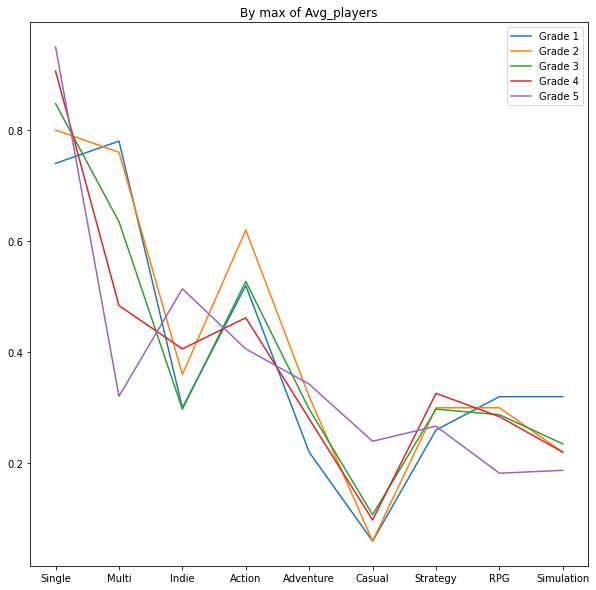

In [51]:
data_clean = avg_graded[[#'ReleaseDate', 
        'CategorySinglePlayer',
       'CategoryMultiplayer', 
       'GenreIsIndie', 
                         'GenreIsAction', 
                         'GenreIsAdventure', 
                         'GenreIsCasual',
       'GenreIsStrategy', 
                         'GenreIsRPG', 
                         'GenreIsSimulation','Grade']]

#threshold = .2
#data_clean = data_clean.drop(data_clean.mean(axis=0)[data_clean.mean(axis=0) < threshold].index.values,axis=1)

data_clean.columns = ['Single', 'Multi', 'Indie',
       'Action', 'Adventure', 'Casual', 'Strategy',
       'RPG', 'Simulation', 'Grade']

grade = [1,2,3,4,5]

data_test_max = {}

plt.figure(figsize=(10,10))

for i in grade:
    data_test_max[i] = data_clean.loc[data_clean['Grade']==i].drop(columns=['Grade'])
    plt.plot(data_test_max[i].columns,data_test_max[i].mean(),label='Grade '+str(i))

plt.legend()
plt.title('By max of Avg_players')
plt.show()

In [60]:
standard = 'mean'

data_craig.sort_values(by=[standard], ascending=False, inplace=True)#.reset_index(drop=True)
avg_graded = data_craig#.loc[data_craig[standard]>=1].copy()

# Rank the games according to 'max'
ranks = [0,50,100,500,1000]

print('Using maximum of Avg_Players:')
for i in ranks:
    print('The cutoff for top '+str(i)+' games is '+str(avg_graded.reset_index(drop=True)[standard][i]))

    
cutoffs = [0] + [avg_graded.reset_index(drop=True)[standard][i] for i in ranks[::-1]]
counts  = avg_graded[standard].value_counts(bins=cutoffs, sort=False,dropna=False) 
print(counts)

grades = [1]*50+[2]*50+[3]*400+[4]*500+[5]*2503
#avg_graded = avg_players.loc[avg_players[standard]>=1].copy()
avg_graded['Grade'] = grades

print('There are '+str(len(grades))+' games stored and assigned with a grade, based on the maximum of Avg_Players.')

Using maximum of Avg_Players:
The cutoff for top 0 games is 452757.72745283006
The cutoff for top 50 games is 7288.155897435898
The cutoff for top 100 games is 2287.784150943397
The cutoff for top 500 games is 222.9035211267606
The cutoff for top 1000 games is 65.18521739130435
(-0.001, 65.185]          2503
(65.185, 222.904]          500
(222.904, 2287.784]        400
(2287.784, 7288.156]        50
(7288.156, 452757.727]      50
Name: mean, dtype: int64
There are 3503 games stored and assigned with a grade, based on the maximum of Avg_Players.


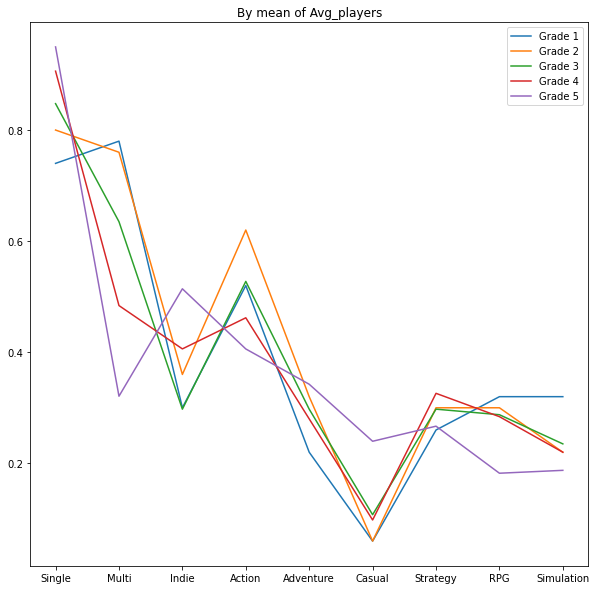

In [61]:
data_clean = avg_graded[[#'ReleaseDate', 
        'CategorySinglePlayer',
       'CategoryMultiplayer', 
       'GenreIsIndie', 
                         'GenreIsAction', 
                         'GenreIsAdventure', 
                         'GenreIsCasual',
       'GenreIsStrategy', 
                         'GenreIsRPG', 
                         'GenreIsSimulation','Grade']]

#threshold = .2
#data_clean = data_clean.drop(data_clean.mean(axis=0)[data_clean.mean(axis=0) < threshold].index.values,axis=1)

data_clean.columns = ['Single', 'Multi', 'Indie',
       'Action', 'Adventure', 'Casual', 'Strategy',
       'RPG', 'Simulation', 'Grade']

grade = [1,2,3,4,5]

data_test_mean = {}

fig = plt.figure(figsize=(10,10))

for i in grade:
    data_test_mean[i] = data_clean.loc[data_clean['Grade']==i].drop(columns=['Grade'])
    plt.plot(data_test_mean[i].columns,data_test_mean[i].mean(),label='Grade '+str(i))

plt.legend()
plt.title('By mean of Avg_players')
plt.show()

avg_graded.columns

In [62]:
standard = 'Metacritic'

data_craig.sort_values(by=[standard], ascending=False, inplace=True)#.reset_index(drop=True)
avg_graded = data_craig#.loc[data_craig[standard]>=1].copy()

# Rank the games according to 'Metacritic'
ranks = [0,50,100,500,1000]

print('Using maximum of Avg_Players:')
for i in ranks:
    print('The cutoff for top '+str(i)+' games is '+str(avg_graded.reset_index(drop=True)[standard][i]))

    
cutoffs = [0] + [avg_graded.reset_index(drop=True)[standard][i] for i in ranks[::-1]]
counts  = avg_graded[standard].value_counts(bins=cutoffs, sort=False,dropna=False) 
print(counts)

grades = [1]*50+[2]*50+[3]*400+[4]*500+[5]*2503
#avg_graded = avg_players.loc[avg_players[standard]>=1].copy()
avg_graded['Grade'] = grades

print('There are '+str(len(grades))+' games stored and assigned with a grade, based on the metacritic of Avg_Players.')

Using maximum of Avg_Players:
The cutoff for top 0 games is 96
The cutoff for top 50 games is 90
The cutoff for top 100 games is 88
The cutoff for top 500 games is 79
The cutoff for top 1000 games is 69
(-0.001, 69.0]    2522
(69.0, 79.0]       503
(79.0, 88.0]       399
(88.0, 90.0]        31
(90.0, 96.0]        48
Name: Metacritic, dtype: int64
There are 3503 games stored and assigned with a grade, based on the metacritic of Avg_Players.


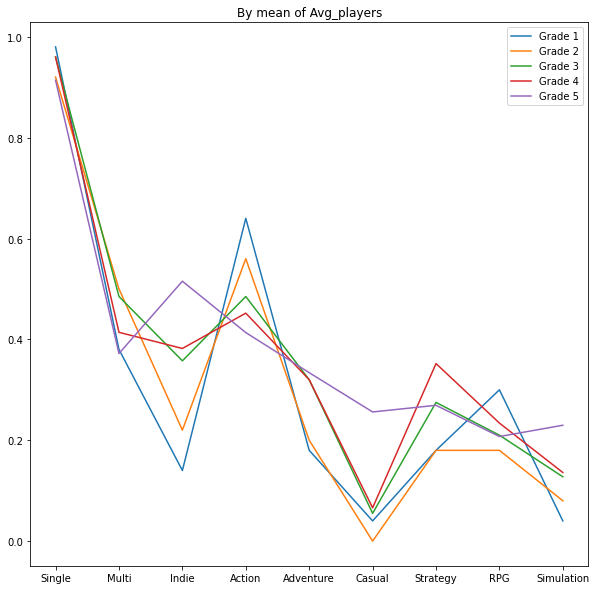

In [63]:
data_clean = avg_graded[[#'ReleaseDate', 
        'CategorySinglePlayer',
       'CategoryMultiplayer', 
       'GenreIsIndie', 
                         'GenreIsAction', 
                         'GenreIsAdventure', 
                         'GenreIsCasual',
       'GenreIsStrategy', 
                         'GenreIsRPG', 
                         'GenreIsSimulation','Grade']]

#threshold = .2
#data_clean = data_clean.drop(data_clean.mean(axis=0)[data_clean.mean(axis=0) < threshold].index.values,axis=1)

data_clean.columns = ['Single', 'Multi', 'Indie',
       'Action', 'Adventure', 'Casual', 'Strategy',
       'RPG', 'Simulation', 'Grade']

grade = [1,2,3,4,5]

data_test_meta = {}

fig = plt.figure(figsize=(10,10))

for i in grade:
    data_test_meta[i] = data_clean.loc[data_clean['Grade']==i].drop(columns=['Grade'])
    plt.plot(data_test_meta[i].columns,data_test_meta[i].mean(),label='Grade '+str(i))

plt.legend()
plt.title('By mean of Avg_players')
plt.show()

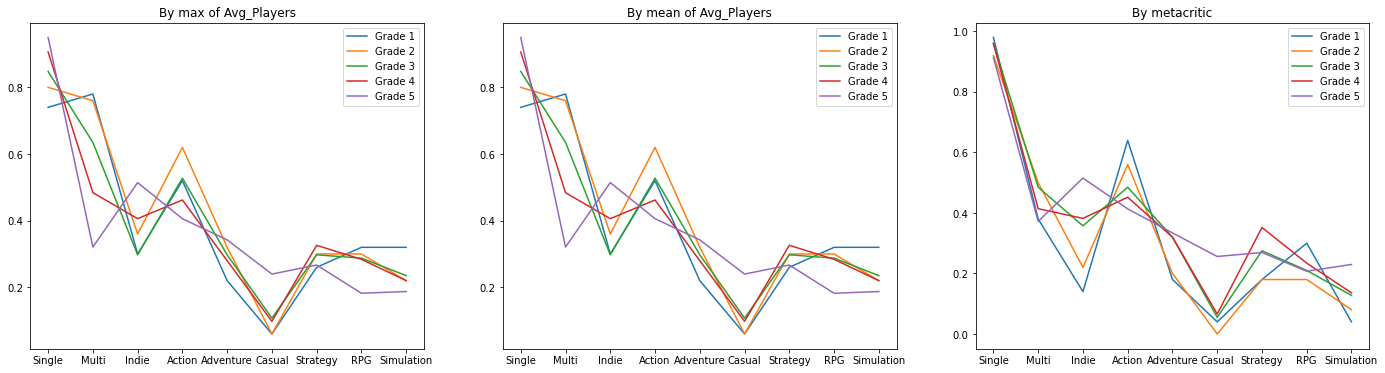

In [71]:
fig,ax=plt.subplots(1,3,figsize=(24,6))

for i in grade:    
    ax[0].plot(data_test_max[i].columns,data_test_max[i].mean(),label='Grade '+str(i))
    ax[1].plot(data_test_mean[i].columns,data_test_mean[i].mean(),label='Grade '+str(i))    
    ax[2].plot(data_test_meta[i].columns,data_test_meta[i].mean(),label='Grade '+str(i))
    
    ax[0].set_title('By max of Avg_Players')
    ax[1].set_title('By mean of Avg_Players')
    ax[2].set_title('By metacritic')

ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

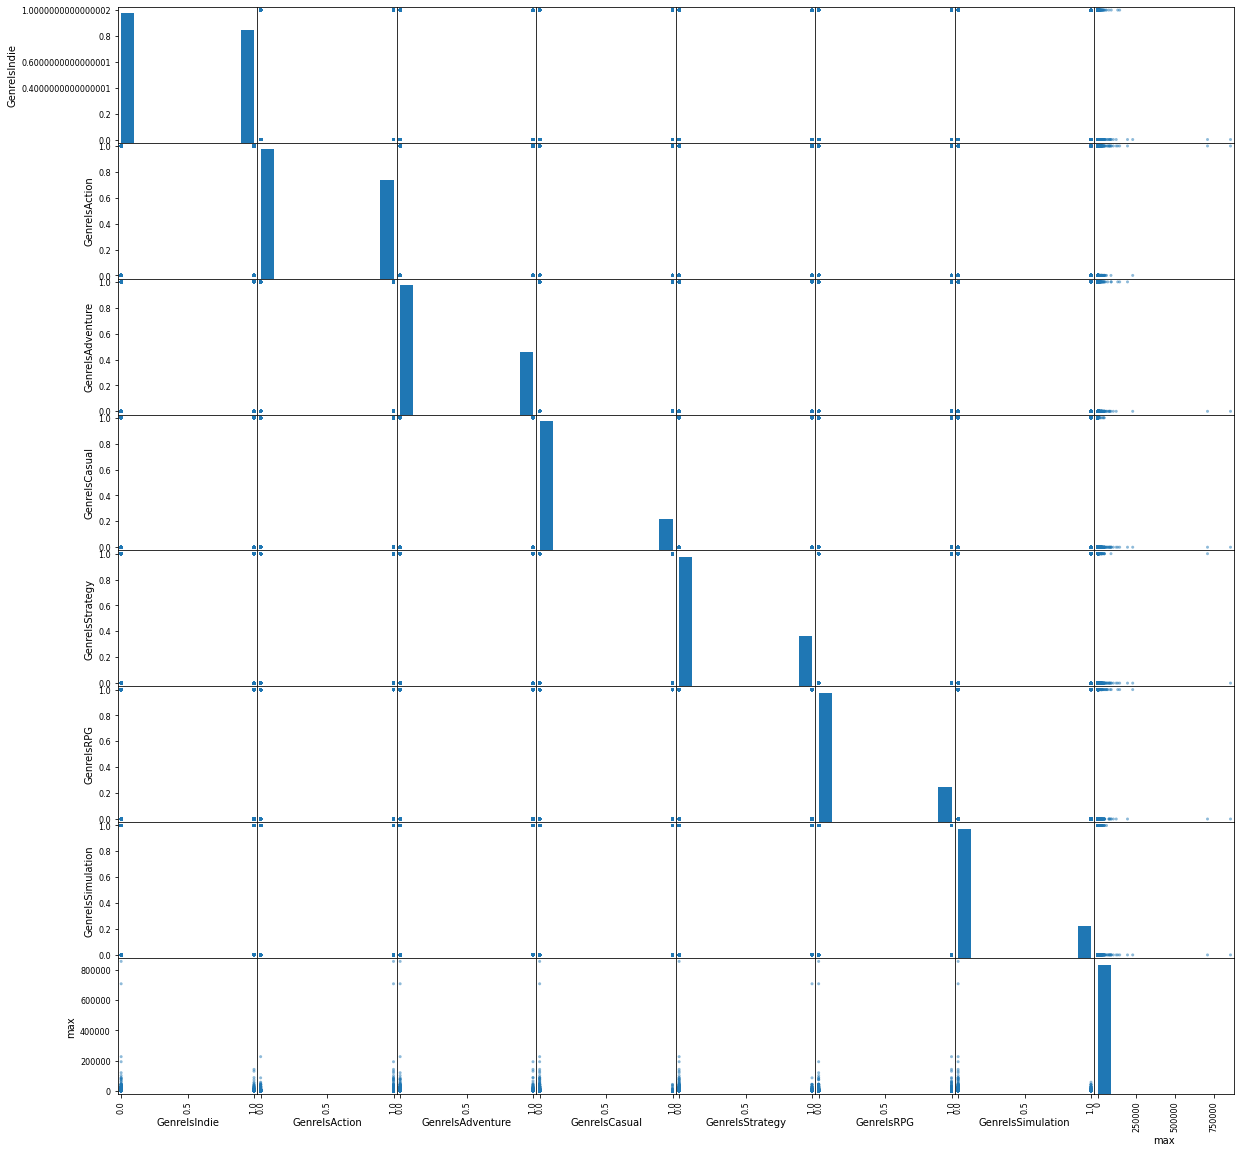

In [252]:
data_test = data_craig[[ #'RecommendationCount',
        #'CategorySinglePlayer',
       #'CategoryMultiplayer', 
       'GenreIsIndie', 
                       'GenreIsAction', 
                        'GenreIsAdventure', 
                        'GenreIsCasual',
       'GenreIsStrategy', 
                         'GenreIsRPG', 
                        'GenreIsSimulation', 
       #'PriceFinal',
                        'max']].astype(float)

scatter_matrix(data_test,figsize=(20,20))
plt.show()

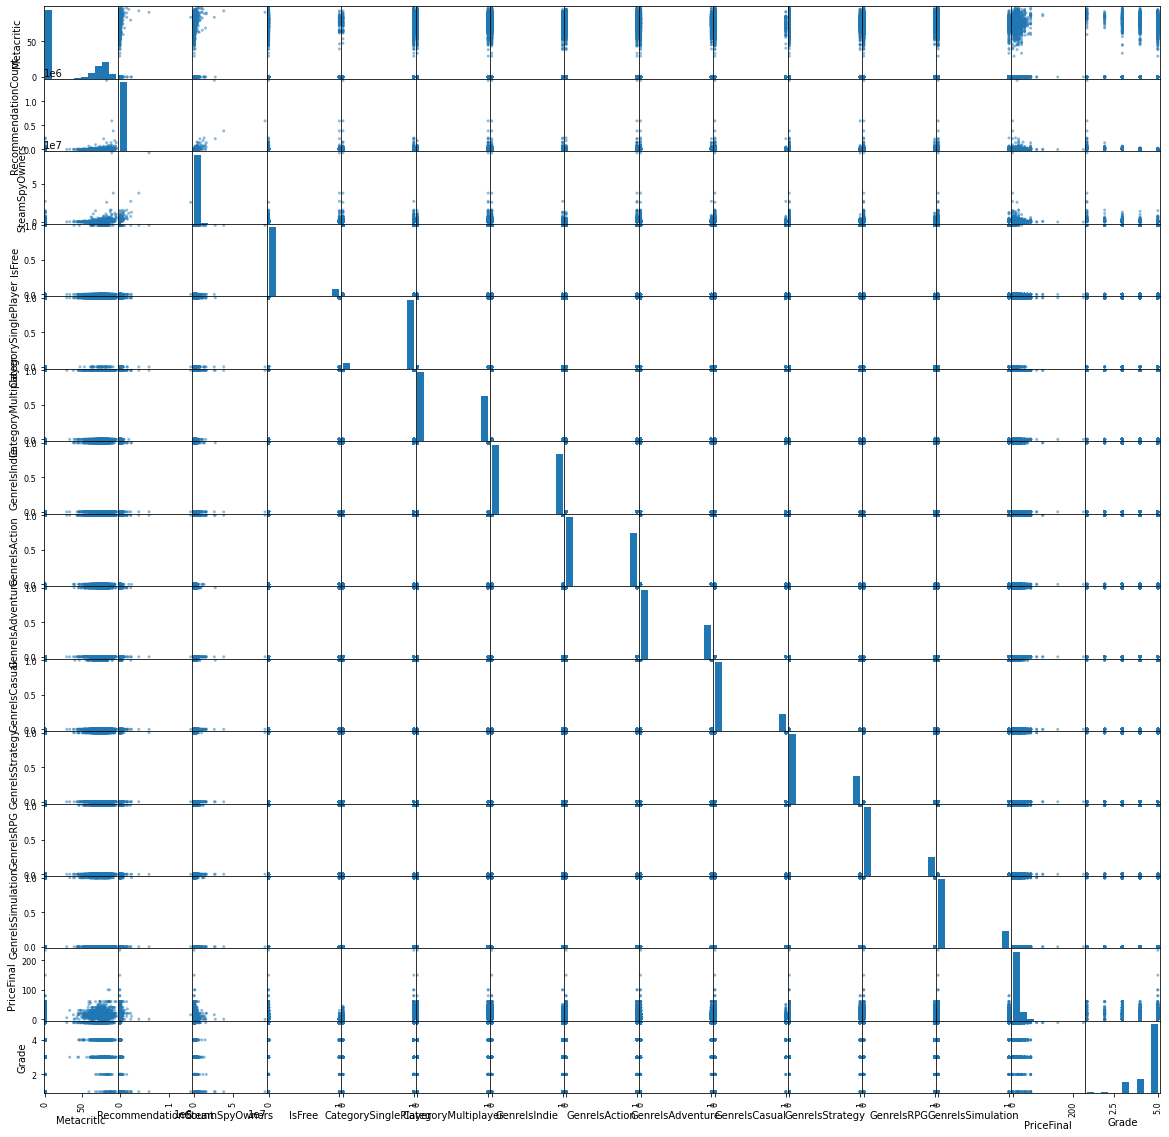